# Data Analytics Internship level 3

## Project title : Product Category vs Sales & Rating

Dataset : Given dataset

**________________________________________________________________________________________________________________________________________________________________________________**

### *Product Category vs Sales & Rating*  

Identify top-performing product categories and check if sales volume aligns with customer ratings.  

**Instructions:**  
*• Aggregate total Quantity sold and average Rating per category.*  

*• Calculate correlation between Quantity and Rating.*  

*• Plot bar and scatter charts for insights.*  

**Tools:**
*pandas groupby, corr(), seaborn/matplotlib*

---

In [2]:
# importing nacessary libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
#loading data

data = pd.read_csv('dataset.csv')
data.head()

,OrderID,Date,CustomerID,ProductCategory,Quantity,UnitPrice,TotalAmount,DeliveryStatus,PaymentMethod,Rating,Review,Country
0,1000.0,2024-06-12,C008,Electronics,3.0,1203.0,3609.0,Delivered,COD,3.0,"Terrible service, not buying again.",canada
1,1001.0,23-01-2024,C038,Books,1.0,322.0,322.0,Delivered,COD,5.0,NaN,canada
2,1002.0,2024-06-03,C002,Beauty,NaN,2432.0,4864.0,In Transit,COD,4.0,Very good quality and support.,NaN
3,1003.0,2024-03-12,C001,Apparel,4.0,1593.0,6372.0,In Transit,COD,4.0,Excellent packaging and quality.,uk
4,1004.0,2024-01-27,C006,Books,1.0,1670.0,1670.0,In Transit,Credit Card,2.0,Great product and fast delivery!,germany


In [4]:
data.shape

(600, 12)

In [5]:
# basic EDA

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          570 non-null    float64
 1   Date             570 non-null    object 
 2   CustomerID       570 non-null    object 
 3   ProductCategory  570 non-null    object 
 4   Quantity         570 non-null    float64
 5   UnitPrice        570 non-null    float64
 6   TotalAmount      570 non-null    float64
 7   DeliveryStatus   570 non-null    object 
 8   PaymentMethod    571 non-null    object 
 9   Rating           570 non-null    float64
 10  Review           570 non-null    object 
 11  Country          571 non-null    object 
dtypes: float64(5), object(7)
memory usage: 56.4+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
OrderID,570.0,1150.066667,86.672783,1000.0,1074.0,1151.5,1224.75,1299.0
Quantity,570.0,3.001754,1.401103,1.0,2.0,3.0,4.00,5.0
UnitPrice,570.0,1378.145614,673.799302,201.0,800.0,1388.5,1981.00,2499.0
TotalAmount,570.0,4152.364912,2963.641027,237.0,1730.0,3444.0,5898.00,12440.0
Rating,570.0,3.222807,1.221299,1.0,2.0,3.0,4.00,5.0


In [7]:
#Data Cleaning 

data.duplicated().sum()

np.int64(69)

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.isnull().sum()

OrderID            30
Date               30
CustomerID         30
ProductCategory    29
Quantity           30
UnitPrice          29
TotalAmount        30
DeliveryStatus     29
PaymentMethod      29
Rating             30
Review             29
Country            29
dtype: int64

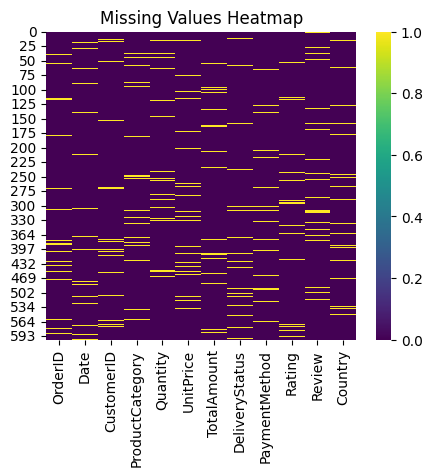

In [11]:
#visual representation of null valuess
plt.figure(figsize=(5,4))
sns.heatmap(data.isnull() ,cmap = 'viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [12]:
#Drop raws where ProductCategory is missing 

data = data.dropna(subset=['ProductCategory'])

In [13]:
#Fill numerical columns

data['Quantity'].fillna(data['Quantity'].median() , inplace=True)

data['Rating'].fillna(data['Rating'].mean() , inplace=True)

C:\Users\mr.ss\AppData\Local\Temp\ipykernel_9576\3527506574.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Quantity'].fillna(data['Quantity'].median() , inplace=True)
C:\Users\mr.ss\AppData\Local\Temp\ipykernel_9576\3527506574.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [14]:
#Fill Categorical columns

data['DeliveryStatus'].fillna('Unknown' , inplace=True)

data['Country'].fillna('Unknown' , inplace=True)

C:\Users\mr.ss\AppData\Local\Temp\ipykernel_9576\3640008350.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DeliveryStatus'].fillna('Unknown' , inplace=True)
C:\Users\mr.ss\AppData\Local\Temp\ipykernel_9576\3640008350.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [15]:
#convert Date Column to datetime format

data['Date'] = pd.to_datetime(data['Date'] , errors='coerce')

In [16]:
data.dtypes

OrderID                   float64
Date               datetime64[ns]
CustomerID                 object
ProductCategory            object
Quantity                  float64
UnitPrice                 float64
TotalAmount               float64
DeliveryStatus             object
PaymentMethod              object
Rating                    float64
Review                     object
Country                    object
dtype: object

---

3.  Product Category vs Sales & Rating Questions---

---

In [17]:
#Total Sales (Quantity) per Category

Sales = data.groupby('ProductCategory')['Quantity'].sum().reset_index()

Sales

,ProductCategory,Quantity
0,Apparel,279.0
1,Beauty,310.0
2,Books,296.0
3,Electronics,301.0
4,Home Decor,319.0


In [18]:
#Average Rating per Category

Avg_Rating = data.groupby('ProductCategory')['Rating'].mean().reset_index()
Avg_Rating

,ProductCategory,Rating
0,Apparel,3.176575
1,Beauty,3.321839
2,Books,3.347529
3,Electronics,3.267183
4,Home Decor,3.085337


In [24]:
#Merge both

final_df = pd.merge(Sales , Avg_Rating , on= 'ProductCategory')

print("\n Aggregate total Quantity sold and average Rating per category.")
final_df


 Aggregate total Quantity sold and average Rating per category.


,ProductCategory,Quantity,Rating
0,Apparel,279.0,3.176575
1,Beauty,310.0,3.321839
2,Books,296.0,3.347529
3,Electronics,301.0,3.267183
4,Home Decor,319.0,3.085337


In [23]:
#Correlation 

corr = final_df['Quantity'].corr(final_df['Rating'])

print("\nCorrelation Output :")
corr


Correlation Output :


np.float64(-0.18162453197192904)

**Insight:** 
*The correlation value of approximately -0.18 indicates a weak nagative relationship between sales and volume* 
*and customer ratings,suggesting that higher sales do not necessarily result in higher customer satisfaction.*

C:\Users\mr.ss\AppData\Local\Temp\ipykernel_9576\608616476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = final_df , x = 'ProductCategory' , y = 'Quantity' , palette='coolwarm')


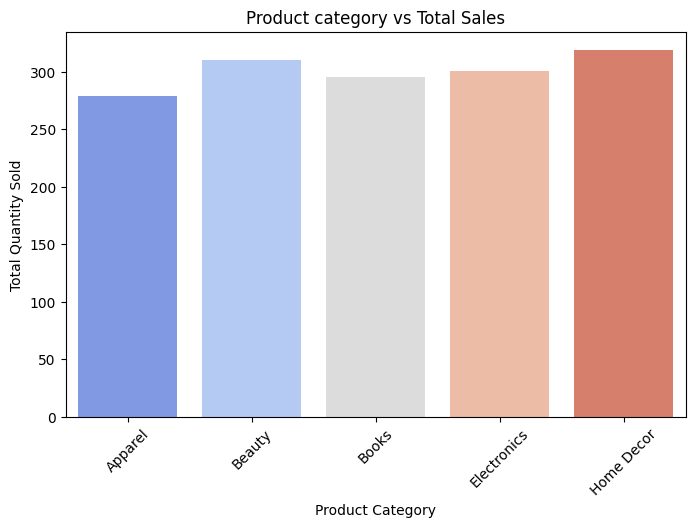

In [21]:
#Product Category vs Total sales (Bar Chart)

plt.figure(figsize=(8,5))
sns.barplot(data = final_df , x = 'ProductCategory' , y = 'Quantity' , palette='coolwarm')

plt.title("Product category vs Total Sales")
plt.xlabel("Product Category")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

**Insight:** 
*The bar chart highlights variations in sales across product categories , with Home Decor leading in total quantity sold.*

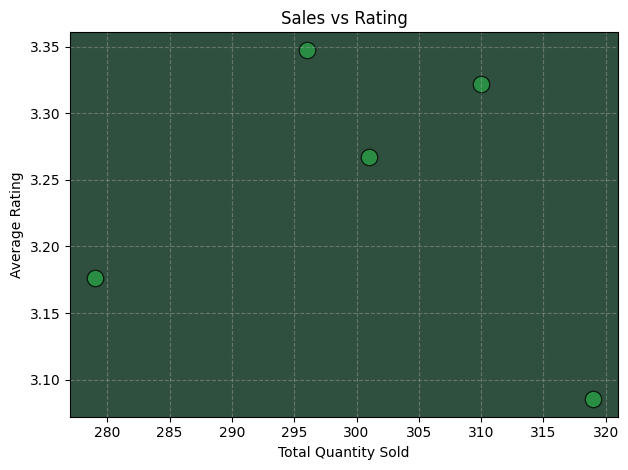

In [22]:
#Sales Vs Rating (Scatter Plot)
plt.gca().set_facecolor("#30503F")

sns.scatterplot(data = final_df , x = 'Quantity' , y = 'Rating',color="#28A347" ,s=140,alpha=0.75 , edgecolor="black" )
plt.title("Sales vs Rating")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Average Rating")

plt.grid(True , linestyle="--" , alpha=0.4)
plt.tight_layout()
plt.show()

**Insight:** 
*The scatter plot shows a week relationship between sales and average rating , suggesting that the factors other than rating influence sales.*


----

## Overall Conclusion

* This analysis explored the relationship between product category sales and customer ratings using aggregated data.
* By combining total quantity sold and average ratings, the study highlights differences in category performance and provides insights into how sales and customer feedback relate to each other.

----